# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sys
print(sys.version)

3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]


## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [2]:
try:
    df_raw = pd.read_csv('../data/checker_timestamp.csv')
except FileNotFoundError as e:
    print("File not found")
    raise e

In [3]:
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'])

In [4]:
df_raw['date'] = df_raw['timestamp'].dt.date
df_raw['hour'] = df_raw['timestamp'].dt.hour
# print(df_raw)

In [5]:
df_raw['is_am'] = df_raw['hour'] < 12
# print(df_raw)

In [6]:
# Группировка по дате и подсчет коммитов AM/PM
grouped = df_raw.groupby(['date', 'is_am']).size().unstack(fill_value=0)
grouped.columns = ['pm', 'am']  # False - PM, True - AM
grouped = grouped[['am', 'pm']]  # Переставляем в нужном порядке
# print(grouped)

In [7]:
# Создание (выходной/рабочий день)
grouped['weekday'] = pd.to_datetime(grouped.index).weekday
grouped['target'] = grouped['weekday'].apply(lambda x: 'weekend' if x >= 5 else 'working_day')

In [8]:
# Создание финального датафрейма
df = pd.DataFrame({
    'date': grouped.index,
    'am': grouped['am'].values,
    'pm': grouped['pm'].values,
    'target': grouped['target'].values
})
print(df)

          date  am   pm       target
0   2020-04-17  21    2  working_day
1   2020-04-18   1   68      weekend
2   2020-04-19  18   15      weekend
3   2020-04-20   2   23  working_day
4   2020-04-21   0   25  working_day
5   2020-04-22   0   28  working_day
6   2020-04-23  10   33  working_day
7   2020-04-24   2   14  working_day
8   2020-04-25  30   74      weekend
9   2020-04-26  28  233      weekend
10  2020-04-27   4    2  working_day
11  2020-04-28   4    1  working_day
12  2020-04-29   0   17  working_day
13  2020-04-30  13   40  working_day
14  2020-05-01   8   52  working_day
15  2020-05-02  91  151      weekend
16  2020-05-03  47  133      weekend
17  2020-05-04  11   26  working_day
18  2020-05-05  81   58  working_day
19  2020-05-06   2    0  working_day
20  2020-05-07  14   38  working_day
21  2020-05-08   3   84  working_day
22  2020-05-09   0   86      weekend
23  2020-05-10  10  133      weekend
24  2020-05-11   3  183  working_day
25  2020-05-12  56  267  working_day
2

In [9]:
print("Первые 5 строк датафрейма и иформация по нему:")
print(df.head(5))
print(df.info())

Первые 5 строк датафрейма и иформация по нему:
         date  am  pm       target
0  2020-04-17  21   2  working_day
1  2020-04-18   1  68      weekend
2  2020-04-19  18  15      weekend
3  2020-04-20   2  23  working_day
4  2020-04-21   0  25  working_day
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    35 non-null     object
 1   am      35 non-null     int64 
 2   pm      35 non-null     int64 
 3   target  35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB
None


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

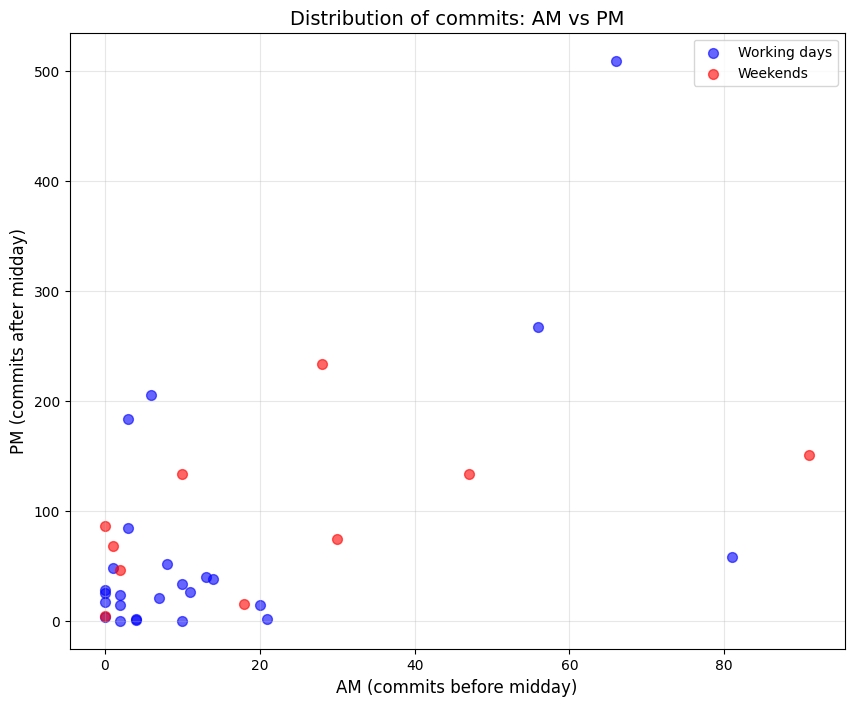

In [19]:
plt.figure(figsize=(10, 8))

# Разделение данных по типу дня
working_days = df[df['target'] == 'working_day']
weekends = df[df['target'] == 'weekend']

# Построение точек
plt.scatter(working_days['am'], working_days['pm'],
           color='blue', label='Working days', alpha=0.6, s=50)
plt.scatter(weekends['am'], weekends['pm'],
           color='red', label='Weekends', alpha=0.6, s=50)

plt.xlabel('AM (commits before midday)', fontsize=12)
plt.ylabel('PM (commits after midday)', fontsize=12)
plt.title('Distribution of commits: AM vs PM', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Ответ:** Нет, это сложно

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [11]:
x = df[['am', 'pm']].values
y = df['target'].values
# print(x, y)

In [12]:
y_binary = (y == 'weekend').astype(int)
# print(y_binary)

In [13]:
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(x, y_binary)

LogisticRegression(fit_intercept=False, random_state=21)

In [14]:
predictions_binary = model.predict(x)
predictions = ['weekend' if pred == 1 else 'working_day' for pred in predictions_binary]


In [15]:
df['predict'] = predictions

In [16]:
try:
    df.to_csv('../data/am_pm.csv', index=False)
    print("\nДатафрейм сохранен в 'data/am_pm.csv'")
except FileExistsError as e:
    print("Cannot write to file 'data/am_pm.csv'")
    raise e


Датафрейм сохранен в 'data/am_pm.csv'


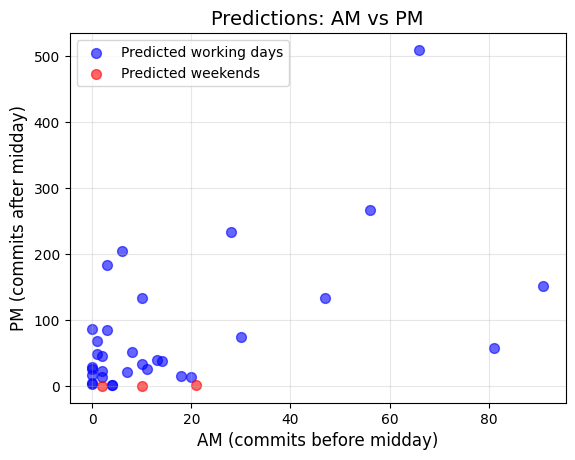

In [17]:
predicted_working = df[df['predict'] == 'working_day']
predicted_weekend = df[df['predict'] == 'weekend']

# Построение точек
plt.scatter(predicted_working['am'], predicted_working['pm'],
           color='blue', label='Predicted working days', alpha=0.6, s=50)
plt.scatter(predicted_weekend['am'], predicted_weekend['pm'],
           color='red', label='Predicted weekends', alpha=0.6, s=50)

plt.xlabel('AM (commits before midday)', fontsize=12)
plt.ylabel('PM (commits after midday)', fontsize=12)
plt.title('Predictions: AM vs PM', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# print(f"\nКоэффициенты модели: {model.coef_}")

**Ответ:** Нет, это плохой подход

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [18]:
accuracy_model = accuracy_score(df['target'], df['predict'])
print(f"Accuracy модели: {accuracy_model}")

# Расчет accuracy для наивного случая (всегда предсказываем самый популярный класс)
most_popular_class = df['target'].value_counts().index[0]
naive_predictions = [most_popular_class] * len(df)
accuracy_naive = accuracy_score(df['target'], naive_predictions)
print(f"Accuracy наивного классификатора: {accuracy_naive}")


print(f"\nУлучшение по сравнению с наивным подходом: {accuracy_model - accuracy_naive:.4f}")
print(f"Относительное улучшение: {((accuracy_model - accuracy_naive) / accuracy_naive * 100):.2f}%")

Accuracy модели: 0.6285714285714286
Accuracy наивного классификатора: 0.7142857142857143

Улучшение по сравнению с наивным подходом: -0.0857
Относительное улучшение: -12.00%


**Ответ:** Нет, это плохой подход